In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import acquire
import prepare
plt.rc('figure', figsize=(10, 5))


# Explore Exercise

## Superstore df

In [30]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [31]:
# prep
df = prepare.prep_store(df)

In [33]:
df.sample(3)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-07-21,38,103.0,690430,9,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548,735 SW Military Dr,San Antonio,9,TX,78221,7,6,355.35
2016-12-18,8,94.0,142050,8,Lea & Perrins,8,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015,15000 San Pedro Ave,San Antonio,8,TX,78232,12,6,157.92
2015-03-22,18,109.0,324013,8,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,15000 San Pedro Ave,San Antonio,8,TX,78232,3,6,478.51


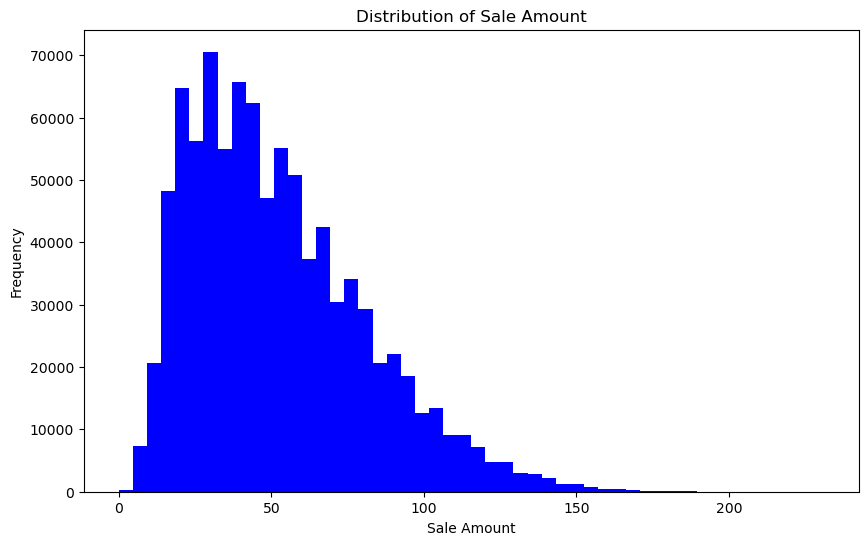

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['sale_amount'], bins=50, color='blue')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Amount')
plt.show()

In [10]:
df.describe(include='all')

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000,913000.000000,913000,913000.000000,9.130000e+05,9.130000e+05,913000,913000,913000.000000,913000,913000.000000,913000.000000,913000.000000,913000.000000
unique,NaN,NaN,NaN,NaN,49,NaN,50,NaN,NaN,NaN,10,1,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Usda Produce,NaN,Riceland American Jazmine Rice,NaN,NaN,NaN,12125 Alamo Ranch Pkwy,San Antonio,NaN,TX,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,36520,NaN,18260,NaN,NaN,NaN,91300,913000,NaN,913000,NaN,NaN,NaN,NaN
mean,25.500000,52.250287,456500.500000,5.500000,NaN,25.500000,NaN,5.160400,2.384688e+11,2.384688e+11,NaN,NaN,5.500000,NaN,78224.800000,6.523549,3.001643,280.898866
std,14.430878,28.801144,263560.542223,2.872283,NaN,14.430878,NaN,2.737764,2.978005e+11,2.978005e+11,NaN,NaN,2.872283,NaN,16.479087,3.448535,1.999316,227.686575
min,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,NaN,0.600000,8.500005e+09,8.500005e+09,NaN,NaN,1.000000,NaN,78201.000000,1.000000,0.000000,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,NaN,13.000000,NaN,2.970000,3.367410e+10,3.367410e+10,NaN,NaN,3.000000,NaN,78217.000000,4.000000,1.000000,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,NaN,25.500000,NaN,5.195000,7.103651e+10,7.103651e+10,NaN,NaN,5.500000,NaN,78220.500000,7.000000,3.000000,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,NaN,38.000000,NaN,7.520000,6.030842e+11,6.030842e+11,NaN,NaN,8.000000,NaN,78232.000000,10.000000,5.000000,402.780000


In [21]:
df.columns

Index(['item', 'sale_amount', 'sale_id', 'store', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'month',
       'day_of_week', 'sales_total'],
      dtype='object')

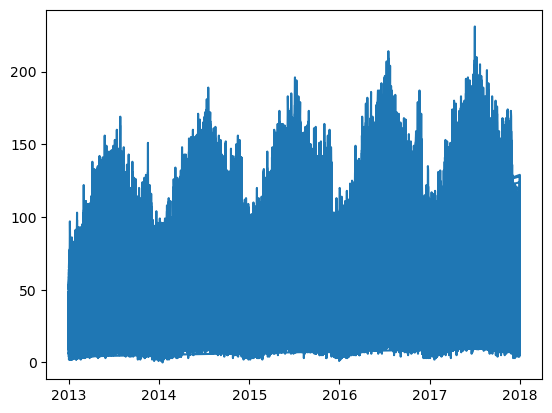

In [37]:
# percentage split with chart
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)

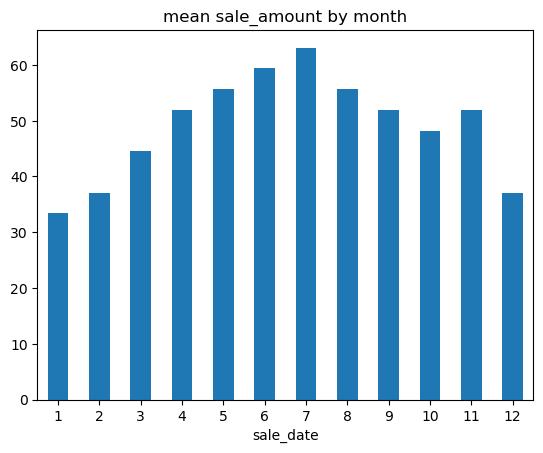

In [38]:
train.groupby(train.index.month).sale_amount.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean sale_amount by month')
plt.show()

In [40]:
y = train.sale_amount


In [41]:
y.head()

sale_date
2013-01-01    13.0
2013-01-02    11.0
2013-01-03    14.0
2013-01-04    13.0
2013-01-05    10.0
Name: sale_amount, dtype: float64

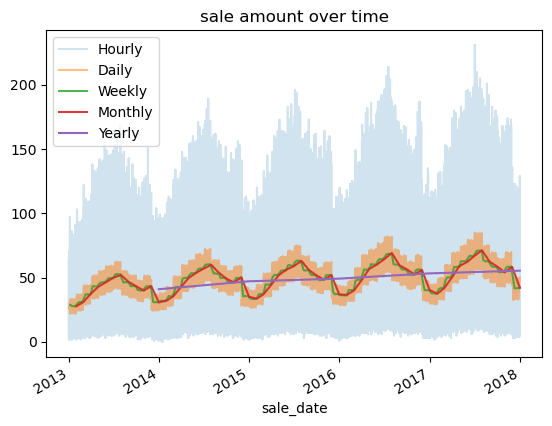

In [42]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('sale amount over time')
plt.legend()
plt.show()

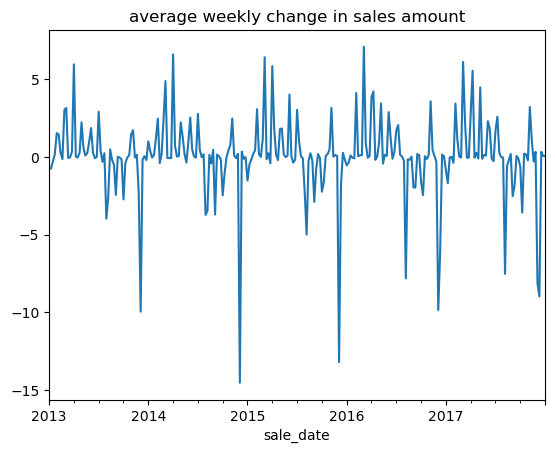

In [45]:
# weekly change over time
y.resample('W').mean().diff().plot(title='average weekly change in sales amount');

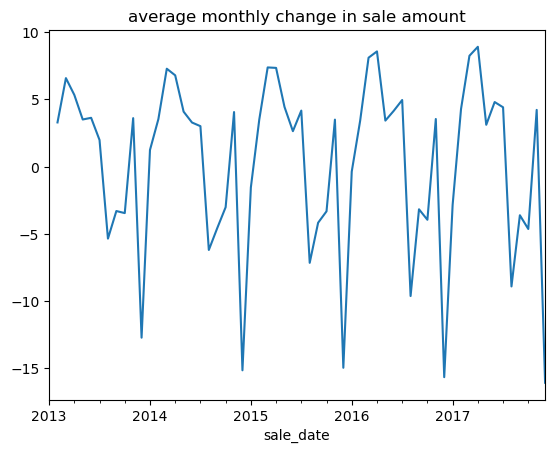

In [48]:
y.resample('M').mean().diff().plot(title='average monthly change in sale amount');


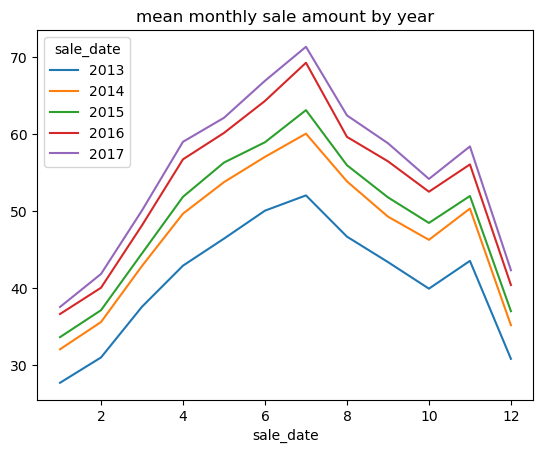

In [49]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly sale amount by year')
plt.show()

In [51]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,27.663226,30.951429,37.535023,42.869810,46.376590,50.008667,51.988940,46.635760,43.335333,39.881567,43.489333,30.770968
2014,32.011521,35.548163,42.830968,49.621810,53.712074,56.993810,60.003963,53.807742,49.234571,46.218802,50.279619,35.135115
2015,33.587742,37.084082,44.463041,51.807333,56.251521,58.890095,63.058802,55.906728,51.735524,48.414009,51.911619,36.955115
2016,36.589309,40.001576,48.103502,56.673714,60.098341,64.252857,69.209124,59.587558,56.417048,52.467005,56.010476,40.355115
2017,37.504793,41.790510,50.036129,58.950381,62.063410,66.868762,71.283226,62.374654,58.761524,54.125806,58.346857,42.274378


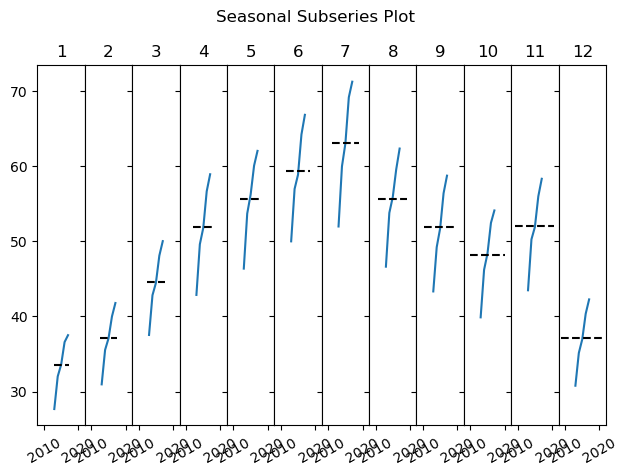

In [52]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [53]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,27.663226,30.951429,37.535023,42.869810,46.376590,50.008667,51.988940,46.635760,43.335333,39.881567,43.489333,30.770968
2014,32.011521,35.548163,42.830968,49.621810,53.712074,56.993810,60.003963,53.807742,49.234571,46.218802,50.279619,35.135115
2015,33.587742,37.084082,44.463041,51.807333,56.251521,58.890095,63.058802,55.906728,51.735524,48.414009,51.911619,36.955115
2016,36.589309,40.001576,48.103502,56.673714,60.098341,64.252857,69.209124,59.587558,56.417048,52.467005,56.010476,40.355115
2017,37.504793,41.790510,50.036129,58.950381,62.063410,66.868762,71.283226,62.374654,58.761524,54.125806,58.346857,42.274378


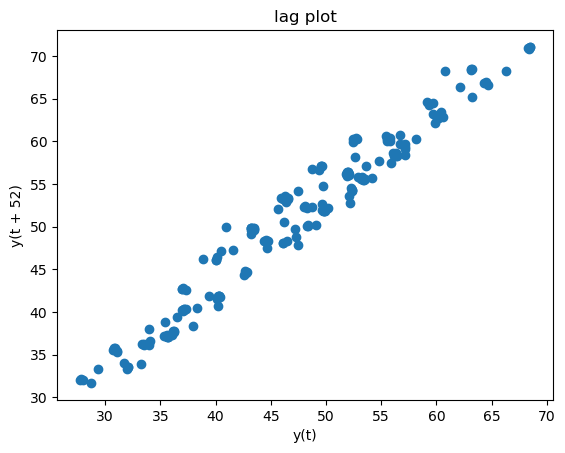

In [55]:
#same thing, but easier
pd.plotting.lag_plot(train.sale_amount.resample('W').mean(), lag=52)
plt.title('lag plot');

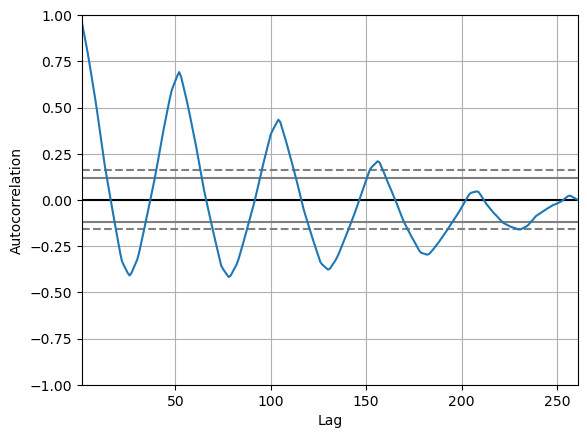

In [56]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())
plt.show()

In [58]:
import statsmodels.api as sm
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

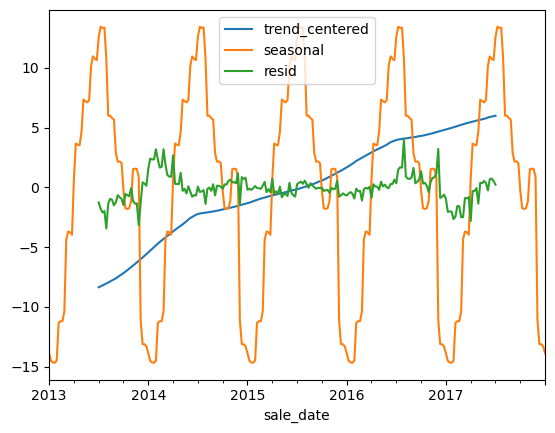

In [59]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

## OPSD df


In [60]:
df = acquire.acquire_opsd_data()

In [61]:
df.shape

(4383, 5)

In [62]:
df = prepare.prep_opsd_data(df)

In [63]:
df.sample(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2011-10-12,1437.389,106.855,0.000,0.000,10,2011
2014-08-07,1352.921,18.331,122.023,140.354,8,2014
2007-05-29,1368.066,0.000,0.000,0.000,5,2007


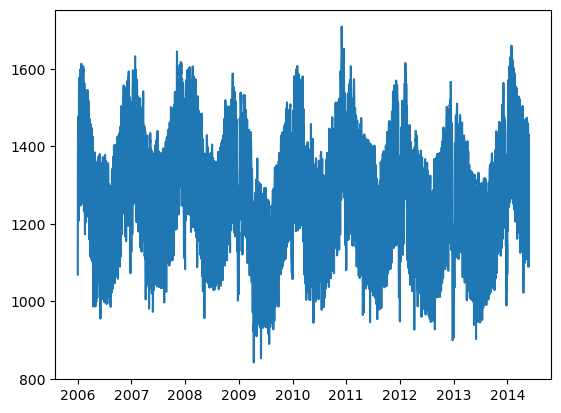

In [66]:
# percentage split with chart
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)

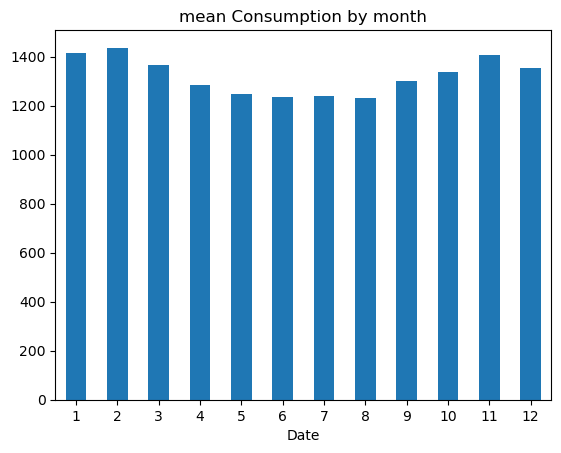

In [67]:
train.groupby(train.index.month).Consumption.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean Consumption by month')
plt.show()

In [68]:
y = train.Consumption


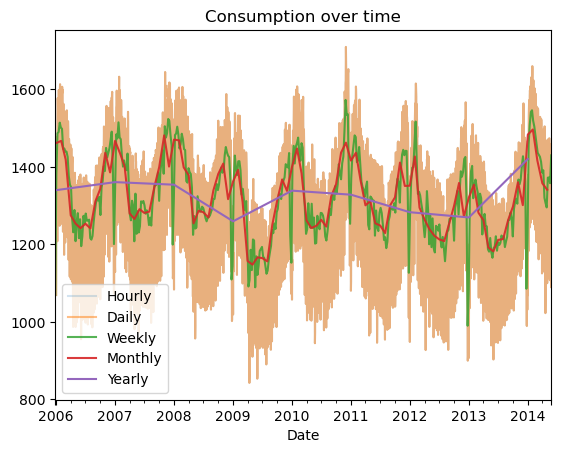

In [69]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('Consumption over time')
plt.legend()
plt.show()

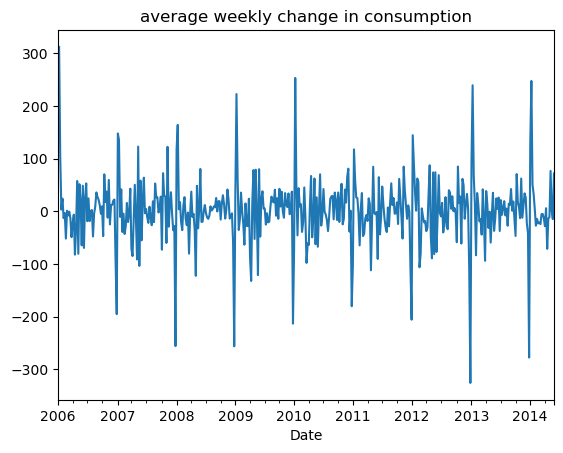

In [70]:
# weekly change over time
y.resample('W').mean().diff().plot(title='average weekly change in consumption');

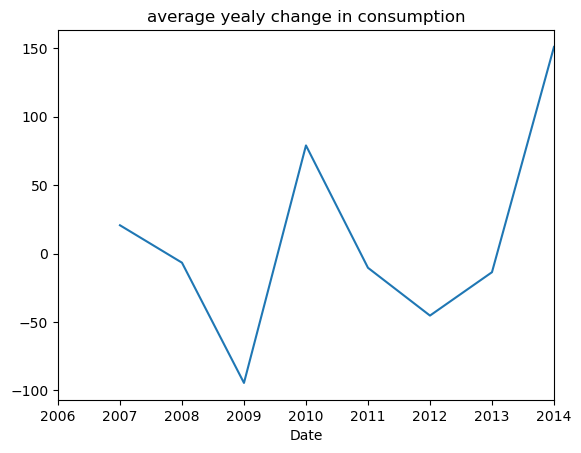

In [71]:
# weekly change over time
y.resample('Y').mean().diff().plot(title='average yealy change in consumption');

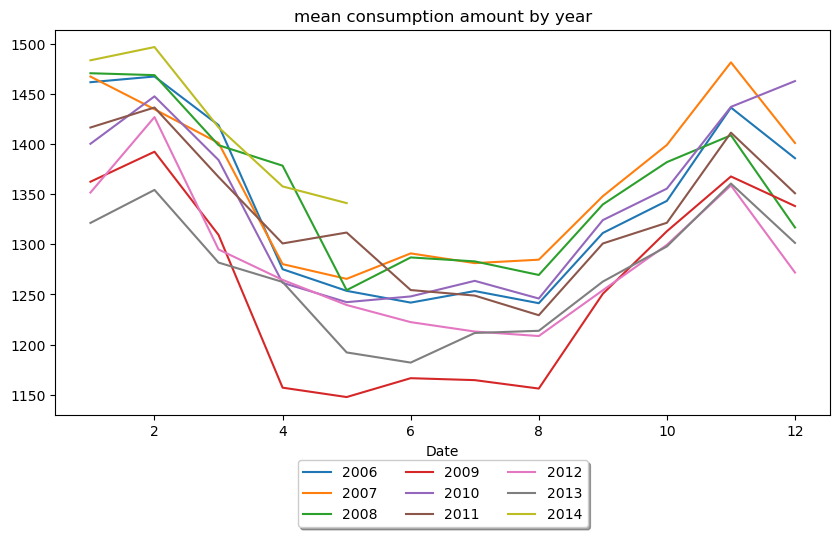

In [88]:

y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
                    ncol=3, fancybox=True, shadow=True)
plt.title('mean consumption amount by year')

plt.show()

In [89]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


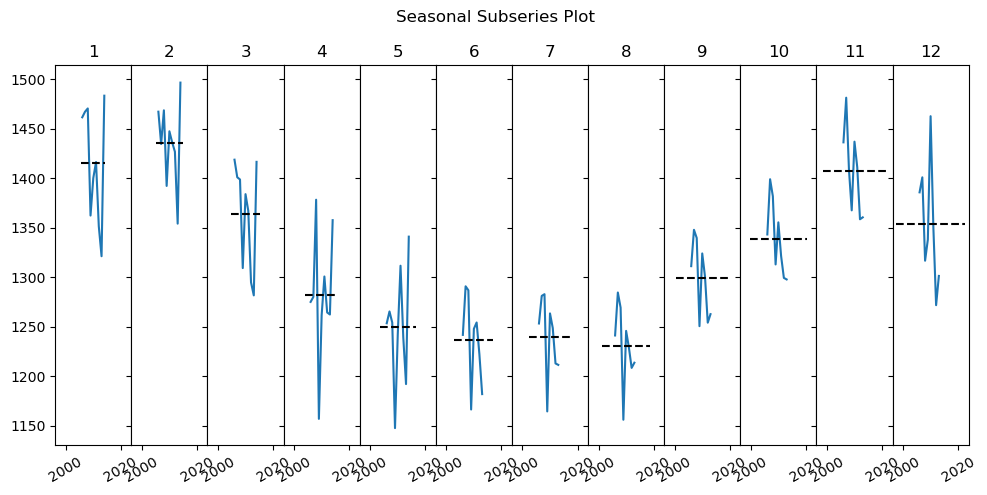

In [90]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [91]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


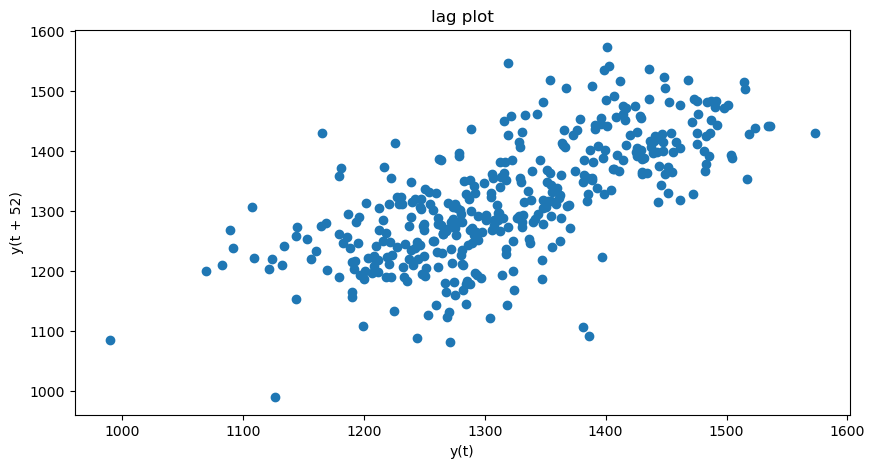

In [93]:
#same thing, but easier
pd.plotting.lag_plot(train.Consumption.resample('W').mean(), lag=52)
plt.title('lag plot');

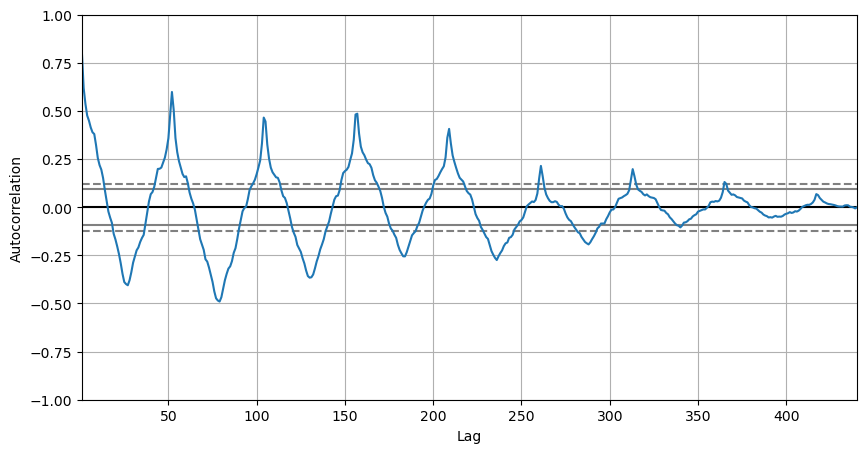

In [95]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())
plt.show()

In [97]:
import statsmodels.api as sm
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

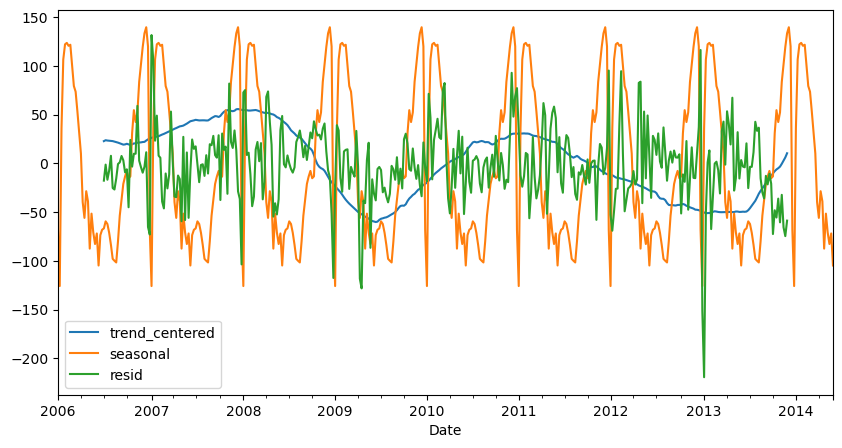

In [98]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();